In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [22]:
boston = datasets.load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [27]:
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['target'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDA

Text(0.5, 1.0, 'boston boxenplot')

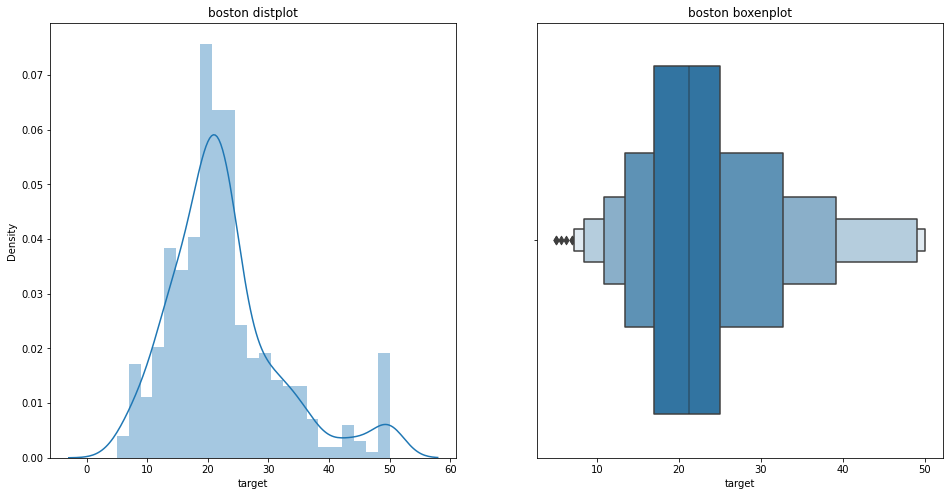

In [29]:
# 종속변수 확인해 보기
# 정규분포를 비슷하게 따르는 것으로 보인다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['target'], ax = ax[0])
sns.boxenplot(data['target'], ax = ax[1])
ax[0].set_title('boston distplot')
ax[1].set_title('boston boxenplot')

Text(0.5, 1.0, 'boston boxenplot')

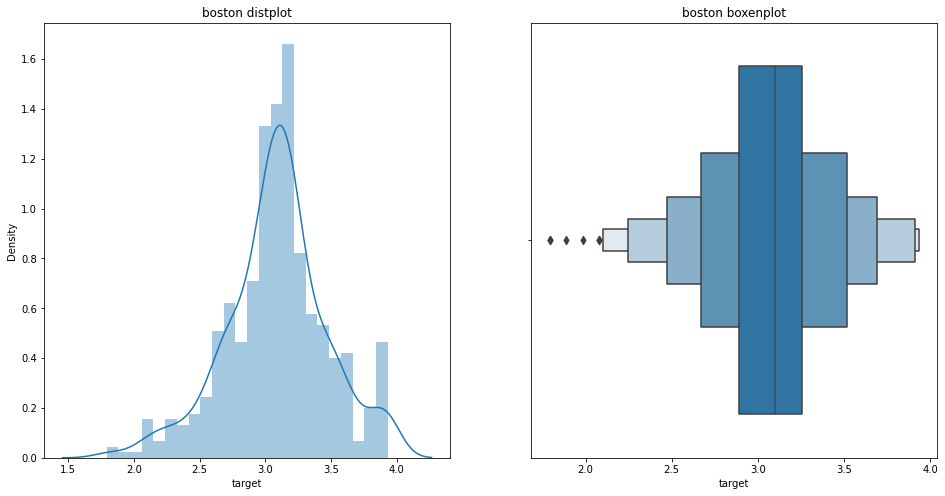

In [30]:
# target변수에 log화를 씌워서 분포를 비교해 본다.
data['target'] = data['target'].apply(lambda x:np.log1p(x))

# 다시 분포를 통해 확인해 본다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['target'], ax = ax[0])
sns.boxenplot(data['target'], ax = ax[1])
ax[0].set_title('boston distplot')
ax[1].set_title('boston boxenplot')

# 아까보다 정규분포를 더 많이 따르는 것으로 확인했고 로그를 씌운 target을 사용하도록 하자.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Text(0.5, 1.0, 'CRIM vs Target scatterplot')

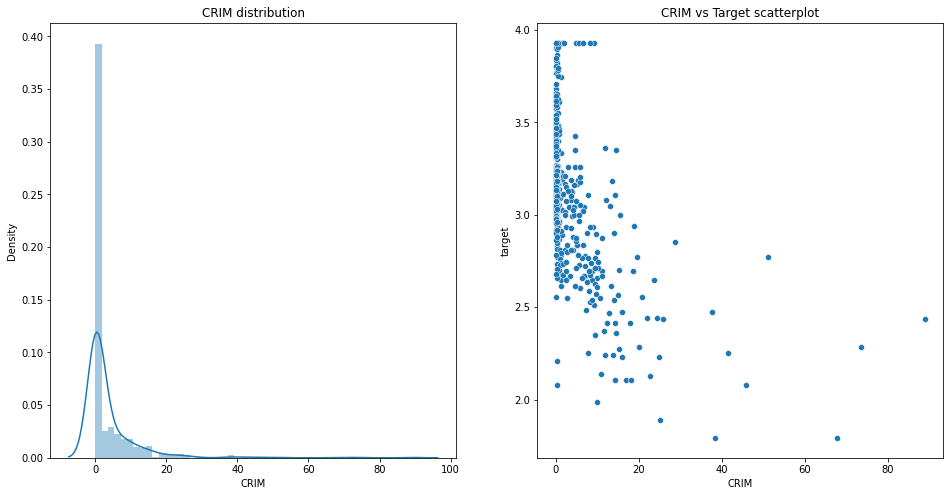

In [36]:
# CRIM
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['CRIM'], ax = ax[0])
sns.scatterplot(data = data, x = 'CRIM', y = 'target', ax = ax[1])
ax[0].set_title('CRIM distribution')
ax[1].set_title('CRIM vs Target scatterplot')

In [37]:
# CRIM은 0에 몰려있기 때문에 정규화를 통해서 분석을 진행해 보자.
data['CRIM'] = data['CRIM'].apply(lambda x:np.log1p(x))

Text(0.5, 1.0, 'CRIM vs Target scatterplot')

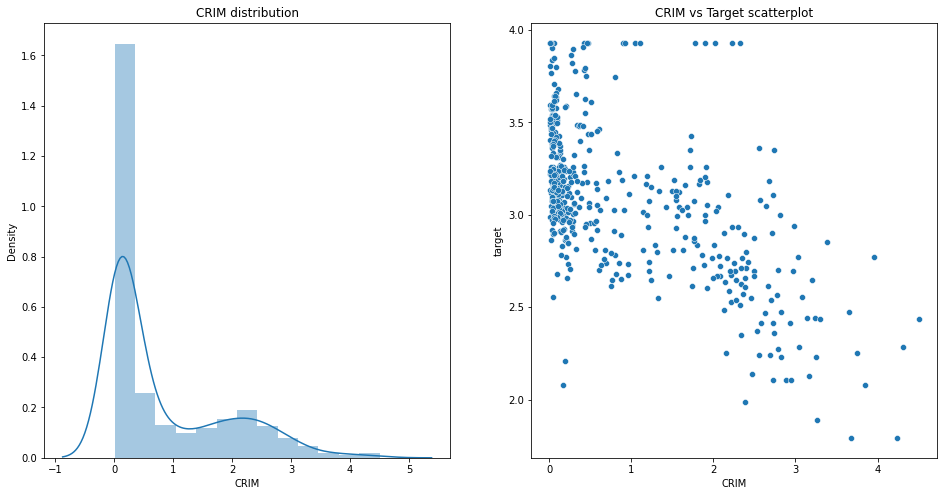

In [38]:
# CRIM
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['CRIM'], ax = ax[0])
sns.scatterplot(data = data, x = 'CRIM', y = 'target', ax = ax[1])
ax[0].set_title('CRIM distribution')
ax[1].set_title('CRIM vs Target scatterplot')

Text(0.5, 1.0, 'ZN vs Target scatterplot')

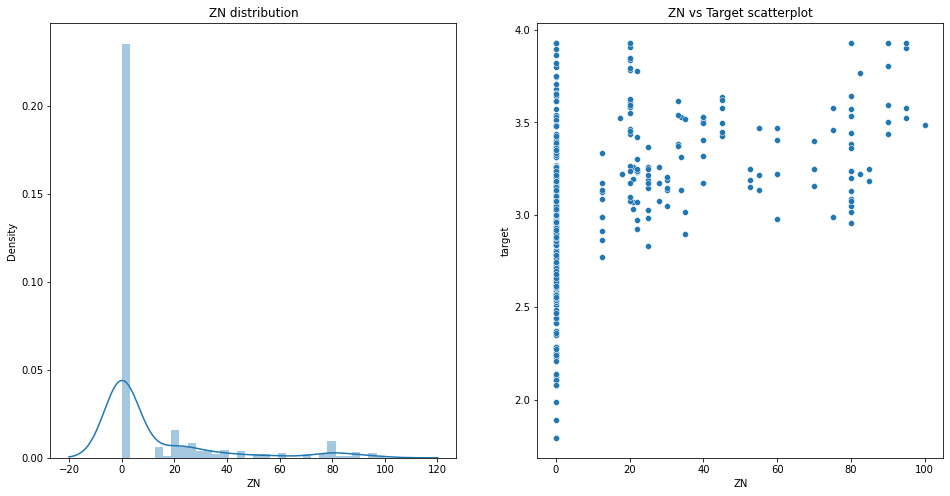

In [39]:
# ZN
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['ZN'], ax = ax[0])
sns.scatterplot(data = data, x = 'ZN', y = 'target', ax = ax[1])
ax[0].set_title('ZN distribution')
ax[1].set_title('ZN vs Target scatterplot')

Text(0.5, 1.0, 'ZN vs Target scatterplot')

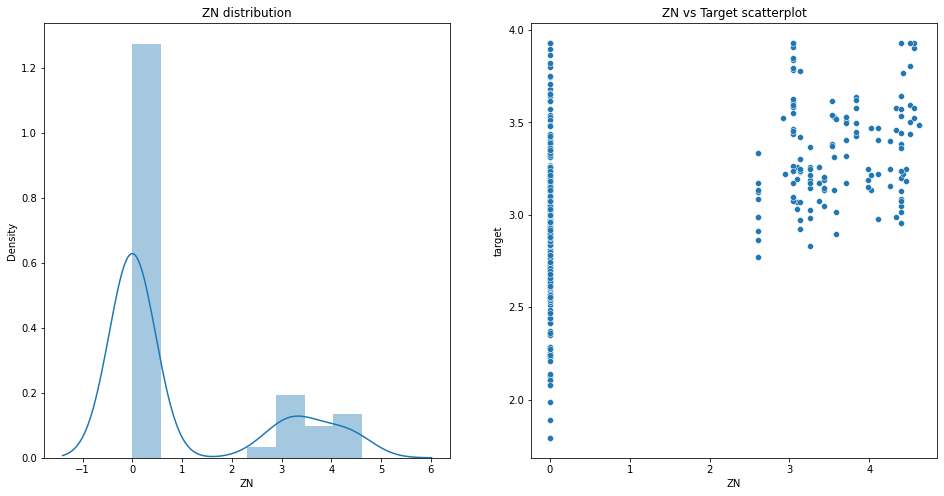

In [41]:
# ZN또한 log를 씌워준다.
data['ZN'] = data['ZN'].apply(lambda x: np.log1p(x))

# ZN
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['ZN'], ax = ax[0])
sns.scatterplot(data = data, x = 'ZN', y = 'target', ax = ax[1])
ax[0].set_title('ZN distribution')
ax[1].set_title('ZN vs Target scatterplot')

Text(0.5, 1.0, 'CHAS vs Target scatterplot')

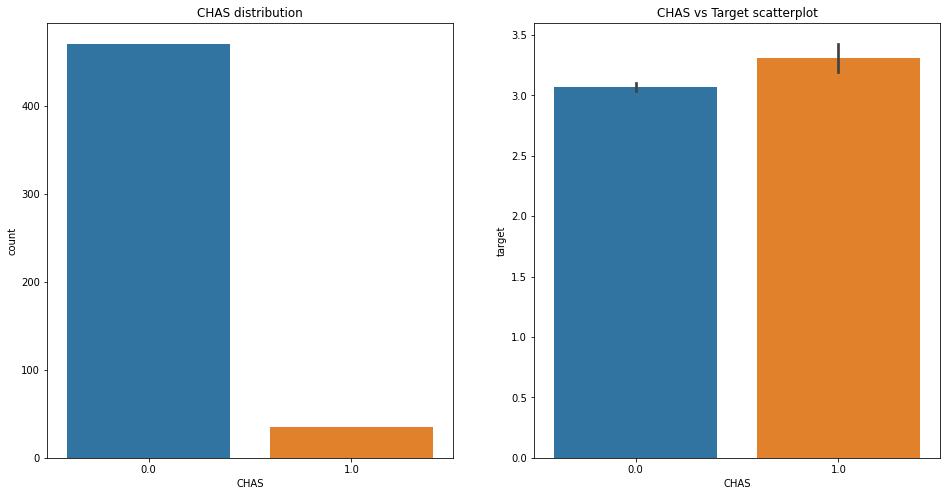

In [44]:
# CHAS # 더미화 시켜줄 것
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.countplot(data['CHAS'], ax = ax[0])
sns.barplot(data = data, x = 'CHAS', y = 'target', ax = ax[1])
ax[0].set_title('CHAS countplot')
ax[1].set_title('CHAS vs Target barplot')

In [45]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

Text(0.5, 1.0, 'NOX vs Target barplot')

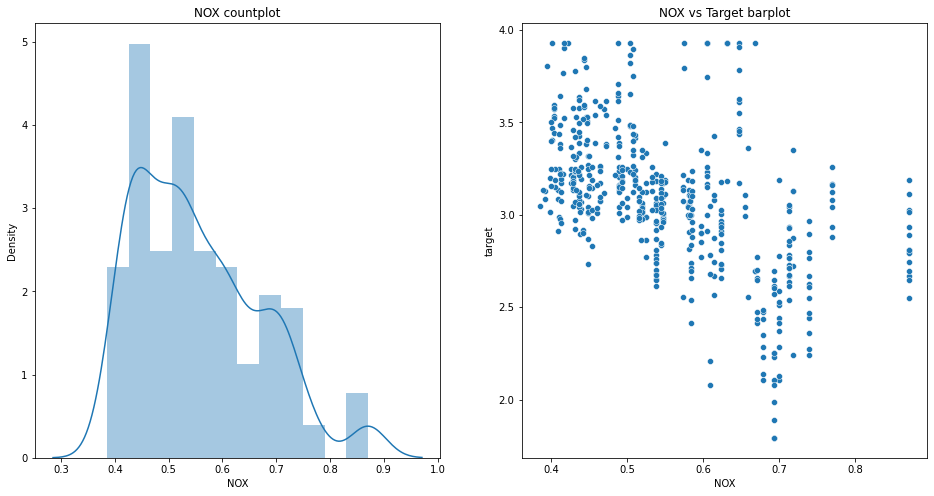

In [48]:
# NOX
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['NOX'], ax = ax[0])
sns.scatterplot(data = data, x = 'NOX', y = 'target', ax = ax[1])
ax[0].set_title('NOX distplot')
ax[1].set_title('NOX vs Target scatterplot')

Text(0.5, 1.0, 'RM vs Target scatterplot')

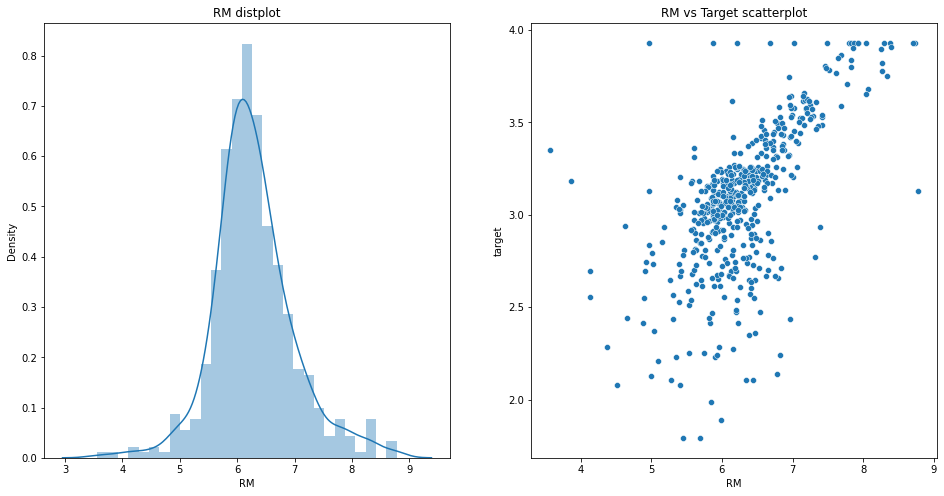

In [51]:
# RM
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['RM'], ax = ax[0])
sns.scatterplot(data = data, x = 'RM', y = 'target', ax = ax[1])
ax[0].set_title('RM distplot')
ax[1].set_title('RM vs Target scatterplot')

Text(0.5, 1.0, 'AGE vs Target scatterplot')

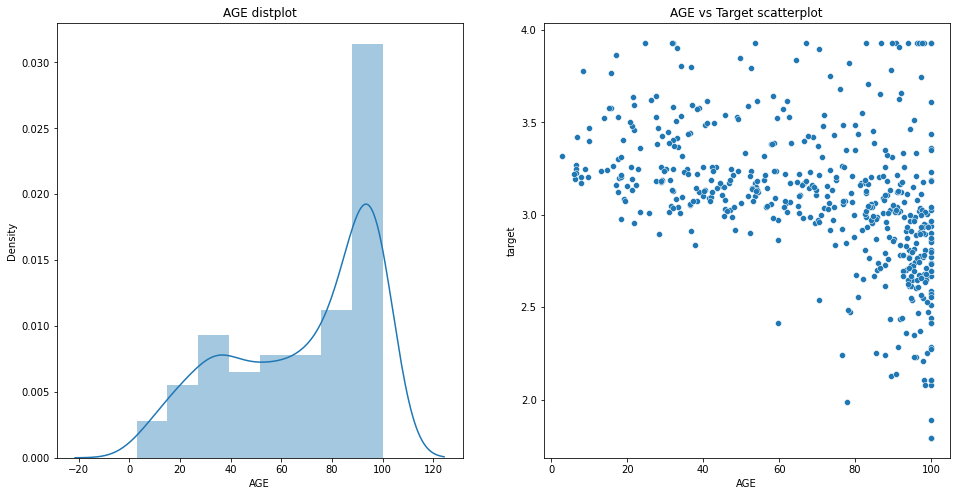

In [53]:
# AGE
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['AGE'], ax = ax[0])
sns.scatterplot(data = data, x = 'AGE', y = 'target', ax = ax[1])
ax[0].set_title('AGE distplot')
ax[1].set_title('AGE vs Target scatterplot')

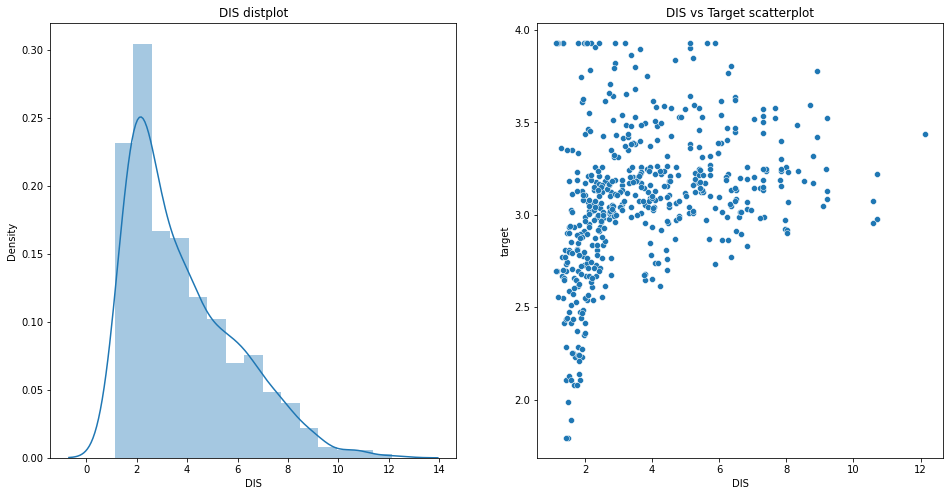

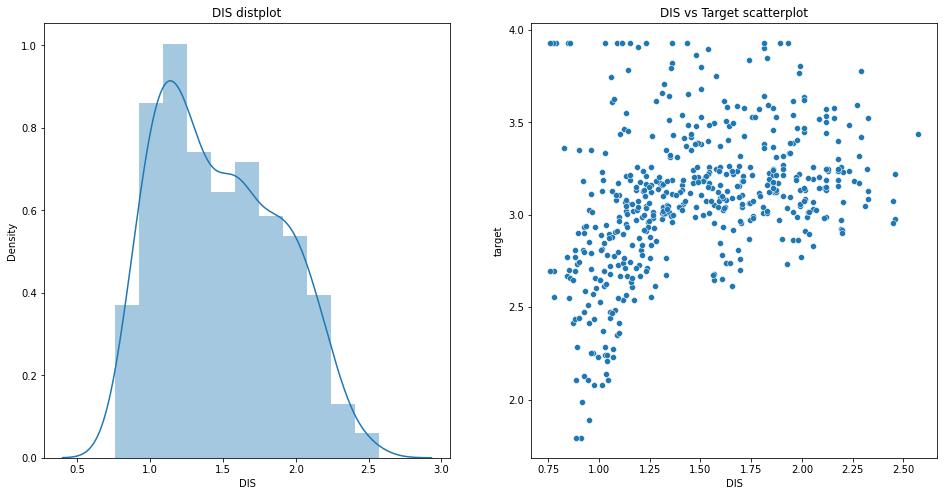

In [55]:
# DIS
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['DIS'], ax = ax[0])
sns.scatterplot(data = data, x = 'DIS', y = 'target', ax = ax[1])
ax[0].set_title('DIS distplot')
ax[1].set_title('DIS vs Target scatterplot')
plt.show()
# log 씌워주기
data['DIS'] = data['DIS'].apply(lambda x: np.log1p(x))

# 다시 그래프 그려주기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['DIS'], ax = ax[0])
sns.scatterplot(data = data, x = 'DIS', y = 'target', ax = ax[1])
ax[0].set_title('DIS distplot')
ax[1].set_title('DIS vs Target scatterplot')
plt.show()

In [56]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

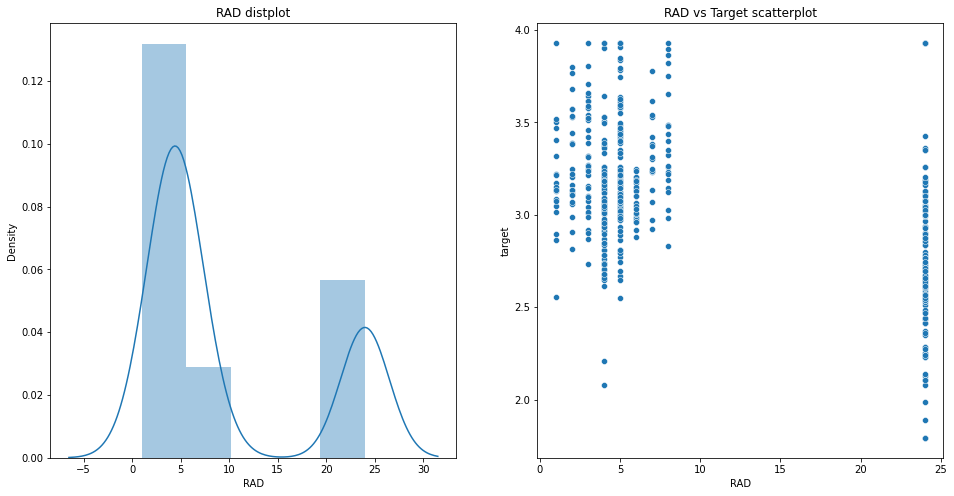

In [57]:
# RAD
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['RAD'], ax = ax[0])
sns.scatterplot(data = data, x = 'RAD', y = 'target', ax = ax[1])
ax[0].set_title('RAD distplot')
ax[1].set_title('RAD vs Target scatterplot')
plt.show()

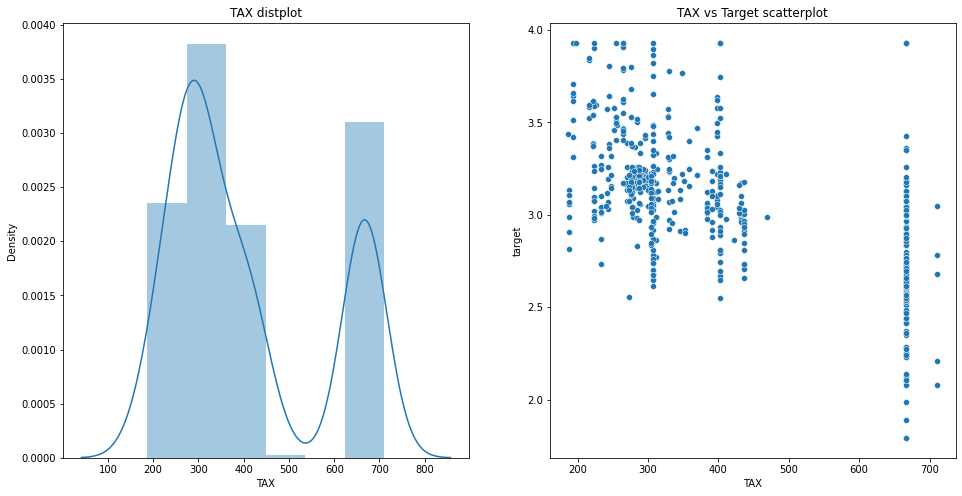

In [58]:
# TAX
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['TAX'], ax = ax[0])
sns.scatterplot(data = data, x = 'TAX', y = 'target', ax = ax[1])
ax[0].set_title('TAX distplot')
ax[1].set_title('TAX vs Target scatterplot')
plt.show()

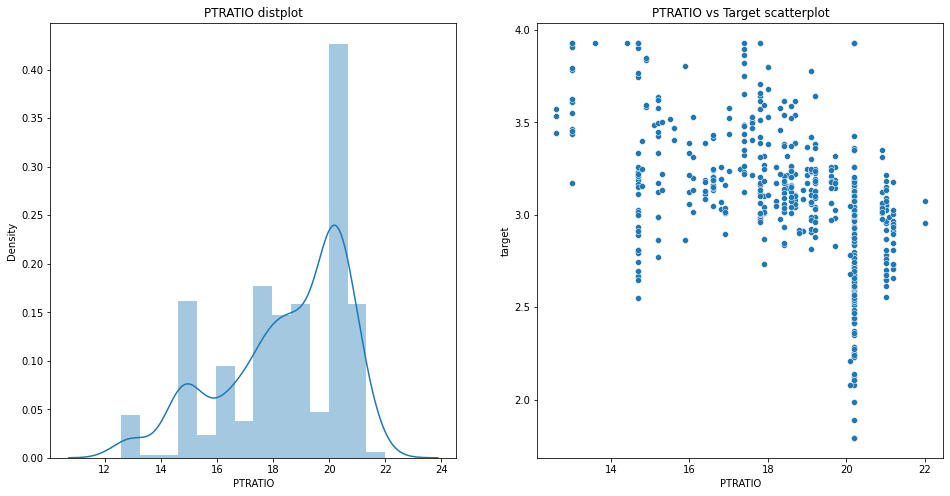

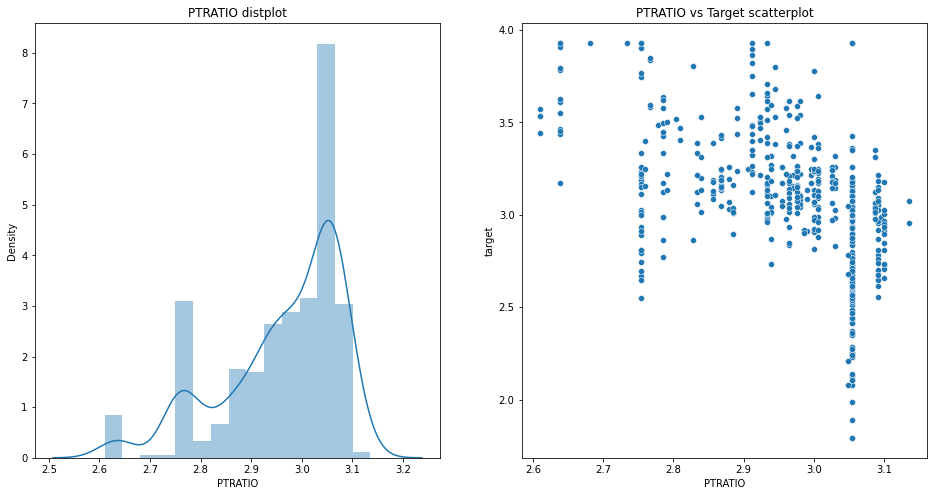

In [60]:
# PTRATIO
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['PTRATIO'], ax = ax[0])
sns.scatterplot(data = data, x = 'PTRATIO', y = 'target', ax = ax[1])
ax[0].set_title('PTRATIO distplot')
ax[1].set_title('PTRATIO vs Target scatterplot')
plt.show()

# 로그를 씌워주고 분석을 진행한다.
data['PTRATIO'] = data['PTRATIO'].apply(lambda x: np.log1p(x))

# 그래프를 그려준다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['PTRATIO'], ax = ax[0])
sns.scatterplot(data = data, x = 'PTRATIO', y = 'target', ax = ax[1])
ax[0].set_title('PTRATIO distplot')
ax[1].set_title('PTRATIO vs Target scatterplot')
plt.show()

In [61]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

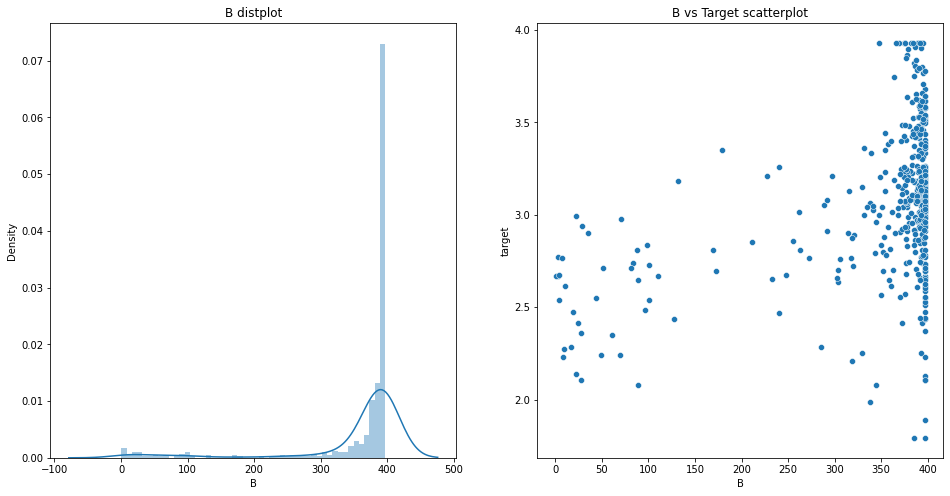

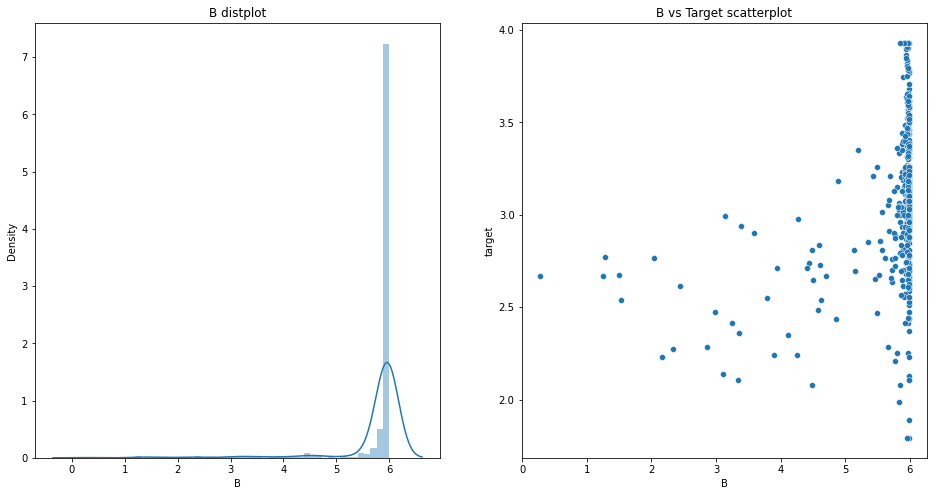

In [63]:
# B
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['B'], ax = ax[0])
sns.scatterplot(data = data, x = 'B', y = 'target', ax = ax[1])
ax[0].set_title('B distplot')
ax[1].set_title('B vs Target scatterplot')
plt.show()

# log를 씌워준다.
data['B'] = data['B'].apply(lambda x: np.log1p(x))

# 다시 그래프를 그려준다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['B'], ax = ax[0])
sns.scatterplot(data = data, x = 'B', y = 'target', ax = ax[1])
ax[0].set_title('B distplot')
ax[1].set_title('B vs Target scatterplot')
plt.show()

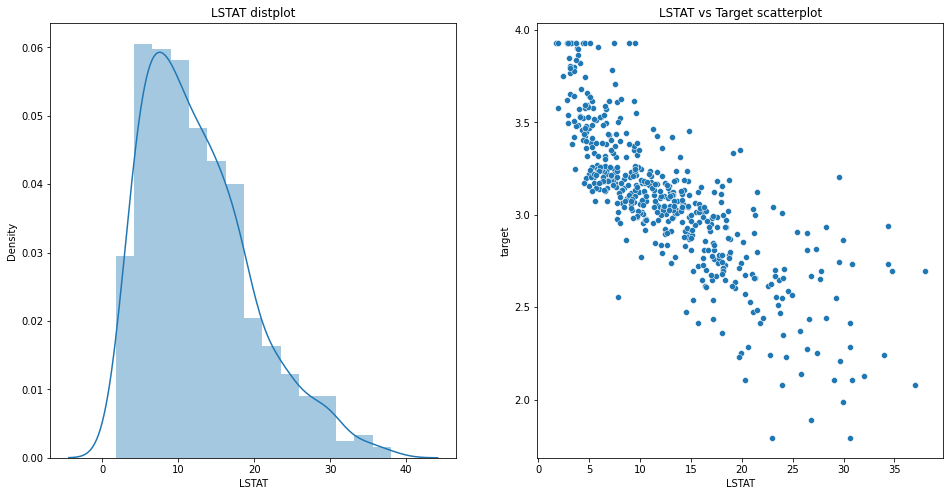

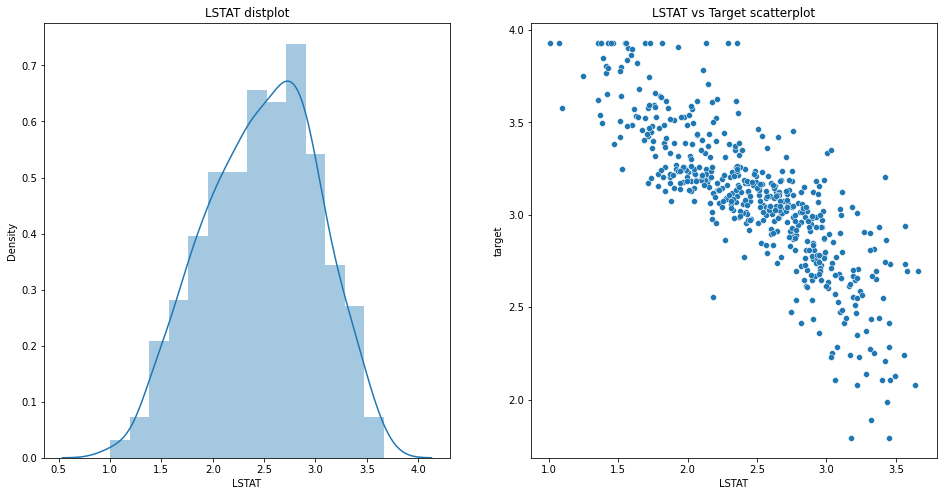

In [65]:
# LSTAT
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['LSTAT'], ax = ax[0])
sns.scatterplot(data = data, x = 'LSTAT', y = 'target', ax = ax[1])
ax[0].set_title('LSTAT distplot')
ax[1].set_title('LSTAT vs Target scatterplot')
plt.show()

# log를 씌워준다.
data['LSTAT'] = data['LSTAT'].apply(lambda x:np.log1p(x))

# 그래프를 그려준다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['LSTAT'], ax = ax[0])
sns.scatterplot(data = data, x = 'LSTAT', y = 'target', ax = ax[1])
ax[0].set_title('LSTAT distplot')
ax[1].set_title('LSTAT vs Target scatterplot')
plt.show()

# statsmodel

In [66]:
import statsmodels.api as sm
X = data.drop('target', axis = 1)
y = data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              7564.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                        0.00
Time:                        02:13:52   Log-Likelihood:                          49.025
No. Observations:                 506   AIC:                                     -72.05
Df Residuals:                     493   BIC:                                     -17.11
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Modeling

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1), data['target'], test_size = 0.2, random_state = 42)

models = {'lr':LinearRegression(), 'ridge':Ridge(), 'lasso':Lasso(),'Elastic':ElasticNet()}
model_rmse = {}
for j,i in models.items():
  model = i
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred = np.exp(y_pred) - 1
  final_y = y_test.copy()
  final_y = np.exp(final_y)-1

  RMSE = mean_squared_error(final_y, y_pred)**0.5
  model_rmse[f'{j}'] = RMSE

print(model_rmse)

{'lr': 4.068527248638521, 'ridge': 4.112920179487871, 'lasso': 7.15533716498366, 'Elastic': 7.077487752024072}
